In [1]:
!pip install pytesseract

In [2]:
from google.colab import files
from IPython.display import Image

In [3]:
uploaded = files.upload()

Saving elon.png to elon.png


In [4]:
!apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (16.2 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [5]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import os
from pytesseract import Output

In [6]:
image = cv2.imread('elon.png')

In [7]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

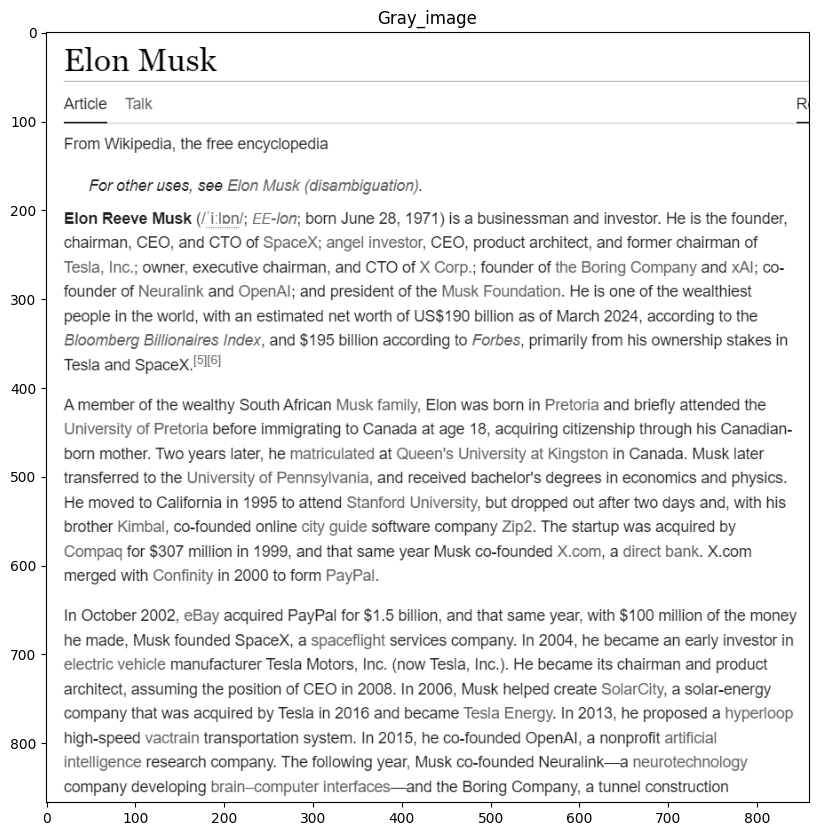

In [8]:
plt.figure(figsize=(10,10))
plt.title('Gray_image')
plt.imshow(gray_image, cmap='gray')

In [9]:
_, threshold_img = cv2.threshold(gray_image, 150, 170, 50)

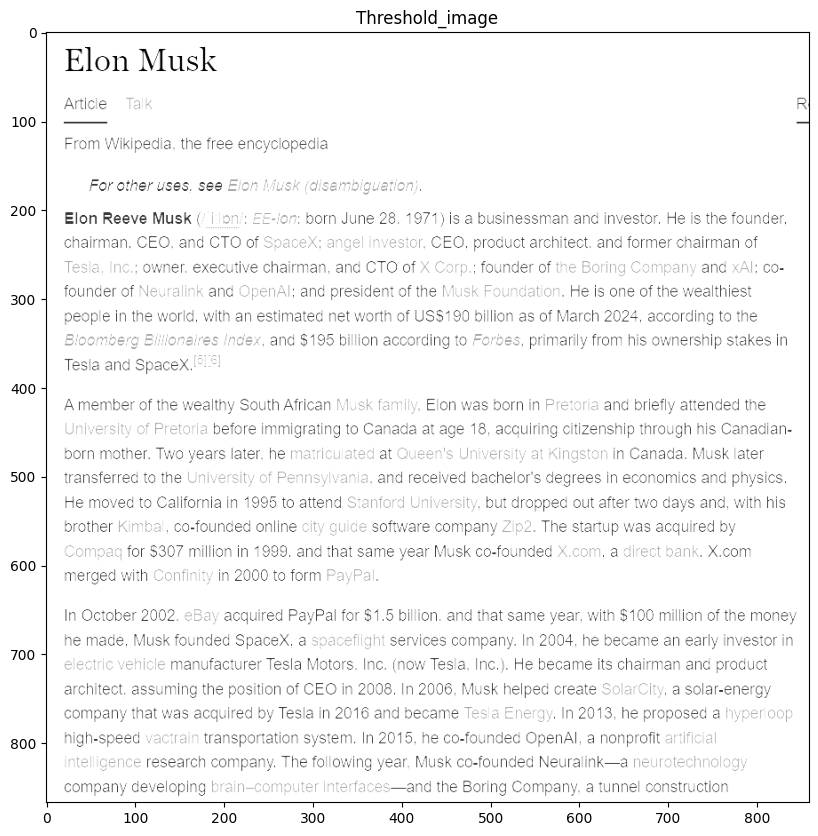

In [10]:
plt.figure(figsize=(10,10))
plt.title('Threshold_image')
plt.imshow(threshold_img, cmap='gray')

In [11]:
custom_config = r'--oem 3 --psm 6'

In [12]:
details = pytesseract.image_to_data(threshold_img, output_type=Output.DICT, config=custom_config, lang='eng')

In [13]:
total_boxes = len(details['text'])
for sequence_number in range(total_boxes):
  if int(details['conf'][sequence_number]) >30:
    (x, y, w, h) = (details['left'][sequence_number], details['top'][sequence_number], details['width'][sequence_number],  details['height'][sequence_number])
    threshold_img = cv2.rectangle(threshold_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

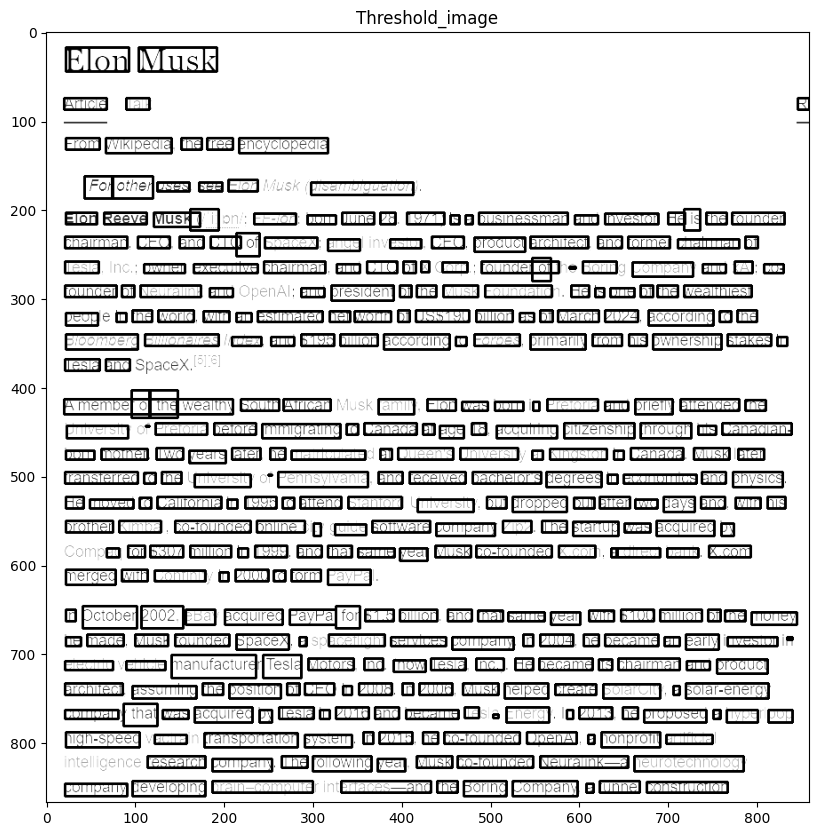

In [14]:
plt.figure(figsize=(10,10))
plt.title('Threshold_image')
plt.imshow(threshold_img, cmap='gray')

In [15]:
parse_text = []
word_list = []
last_word = ''

In [16]:
for word in details['text']:
  if word!='':
     word_list.append(word)
     last_word = word
  if (last_word!='' and word == '') or (word==details['text'][-1]):
    parse_text.append(word_list)
    word_list = []

In [17]:
import csv

In [18]:
with open('result_text.txt', 'w', newline="") as file:
  csv.writer(file, delimiter=" ").writerows(parse_text)